In [156]:
import pandas as pd
import numpy as np


In [157]:
df=pd.read_csv('dataset_with_labels_cleaned.csv')
df

,kilojoules,name,pr_count,average_heartrate,average_watts,total_elevation_gain,elapsed_time,time,date,time_bins,achievement_count,moving_time,sport_type,weighted_average_watts,average_cadence,distance,average_speed,performance_label
0,31.5,Evening Ride,0.0,115.9,40.0,62.34,13.15,19.0,2023-08-13 19:39:30,4pm-8pm,0.0,13.15,Ride,152.0,90.1,2.14,9.76,0.9
1,1366.5,shift in the force,9.0,154.5,143.5,1325.46,169.27,7.0,2023-08-12 07:31:32,4am-8am,17.0,158.72,Ride,160.0,89.8,50.21,18.98,0.2
2,1475.5,Fresh Daily,20.0,151.6,156.9,2368.77,181.98,7.0,2023-08-05 07:00:43,4am-8am,33.0,156.75,Ride,177.0,88.3,47.66,18.24,0.2
3,79.0,Evening Ride,0.0,113.1,55.6,180.45,25.78,19.0,2023-08-02 19:26:29,4pm-8pm,0.0,23.67,Ride,152.0,90.1,3.55,9.01,0.9
4,1285.8,Canceled meeting,9.0,155.3,166.7,1299.21,150.45,6.0,2023-07-21 06:32:07,4am-8am,18.0,128.55,Ride,189.0,88.7,40.54,18.92,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,207.2,Morning Ride,0.0,129.6,37.4,856.30,128.10,8.0,2017-05-06 08:49:09,4am-8am,6.0,92.25,Ride,152.0,56.6,8.04,5.23,0.4
776,109.4,Morning Ride,0.0,129.6,42.6,177.17,45.02,6.0,2017-04-30 06:50:08,4am-8am,1.0,42.80,Ride,152.0,90.1,7.24,10.15,0.7
777,187.3,Morning Ride,0.0,119.6,39.1,291.99,93.07,7.0,2017-04-28 07:02:53,4am-8am,0.0,79.93,Ride,152.0,61.2,13.03,9.78,0.4
778,187.3,Morning Ride,0.0,119.6,39.1,291.99,93.07,7.0,2017-04-28 07:02:53,4am-8am,0.0,79.93,Ride,152.0,61.2,13.03,9.78,0.4


In [158]:
#drop columns witch have more than 50% of null values
df_not_null = df.dropna(thresh=df.shape[0]*0.5,axis=1)

null_percentage = df.isnull().mean()
columns_with_null = null_percentage[null_percentage > 0.5].index
columns_with_null
#there's no >50% null value columns, awesome

Index([], dtype='object')

In [177]:
#print columns with NaN values
df_not_null.columns[df_not_null.isna().any()].tolist()

df_not_null.to_csv('dataset.csv', index=False)
#results in no columns with Nan values, awesome

In [160]:
#drop UNNECESSARY COLUMNS

df_backup = df.drop(["pr_count", "achievement_count", "name", "sport_type" ,"time_bins", "date", "time"], axis=1)

print(df_backup.select_dtypes(include=np.number).corr())
print(df_backup.head())


                        kilojoules  average_heartrate  average_watts  \
kilojoules                1.000000           0.423834       0.683888   
average_heartrate         0.423834           1.000000       0.356774   
average_watts             0.683888           0.356774       1.000000   
total_elevation_gain      0.695556           0.252309       0.348009   
elapsed_time             -0.002188           0.003843      -0.069220   
moving_time               0.902720           0.395069       0.446811   
weighted_average_watts    0.355543           0.204197       0.329212   
average_cadence           0.256669          -0.010922       0.391159   
distance                  0.915379           0.442919       0.528586   
average_speed             0.574605           0.424245       0.735750   
performance_label        -0.408361          -0.330628      -0.529021   

                        total_elevation_gain  elapsed_time  moving_time  \
kilojoules                          0.695556     -0.002188  

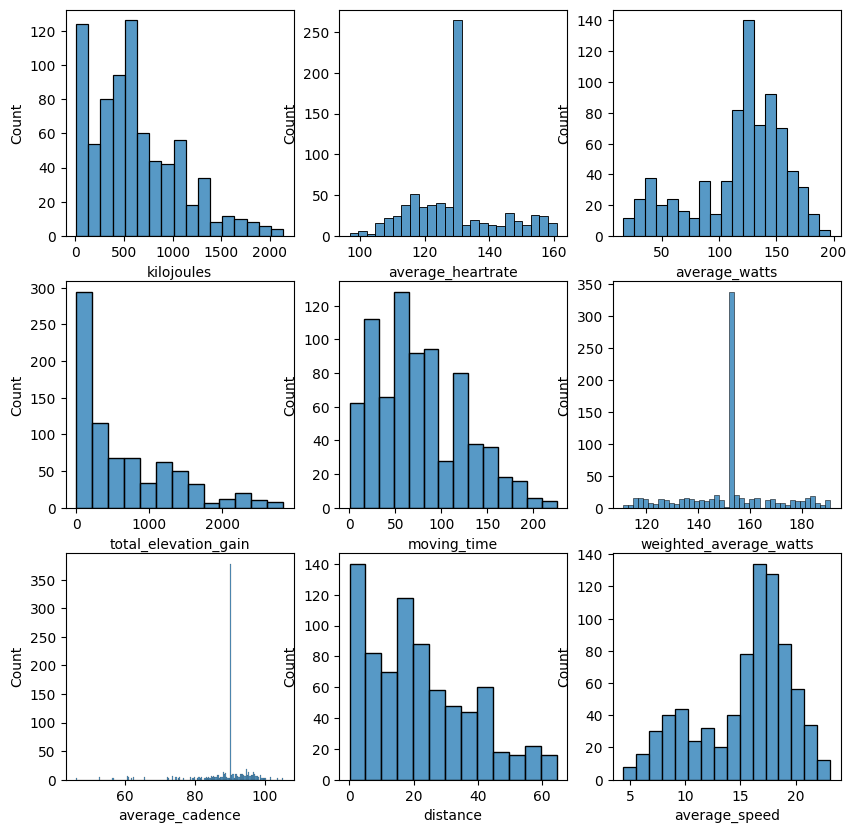

In [161]:
df_without_elapsed_time = df_backup.drop(['elapsed_time'], axis=1) #strictly for better visualization purposes 
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot
fig, ax = plt.subplots(3,3, figsize=(10,10))

flat_ax = ax.flatten()

for i, ax in enumerate(flat_ax):
    sns.histplot(data=df_without_elapsed_time[df_without_elapsed_time.columns[i]], ax=ax)
plt.show()

d:\LICENTA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\paulp\AppData\Local\Temp\ipykernel_17364\3879077593.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\paulp\AppData\Local\Temp\ipykernel_17364\3879077593.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


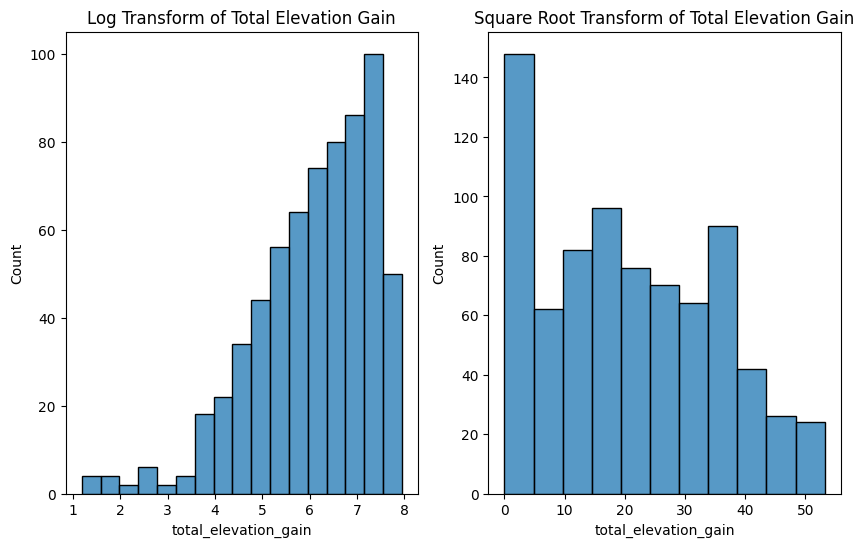

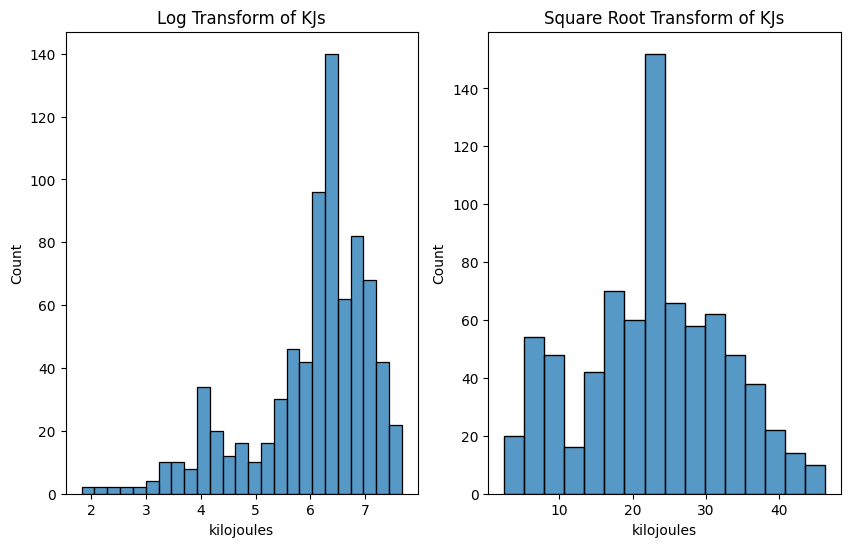

In [162]:
#we will try a Log Transformation on total_elevation_gain and kilojoules to fix their skews
fig, ax = plt.subplots(1, 2, figsize=(10,6))
import seaborn as sns
sns.histplot(np.log(df_backup['total_elevation_gain']), ax=ax[0])
ax[0].set_title('Log Transform of Total Elevation Gain')

sns.histplot(np.sqrt(df_backup['total_elevation_gain']), ax=ax[1])
ax[1].set_title('Square Root Transform of Total Elevation Gain')

fig.show()


fig, ax = plt.subplots(1, 2, figsize=(10,6))

sns.histplot(np.log(df_backup['kilojoules']), ax=ax[0])
ax[0].set_title('Log Transform of KJs')

sns.histplot(np.sqrt(df_backup['kilojoules']), ax=ax[1])
ax[1].set_title('Square Root Transform of KJs')

fig.show()

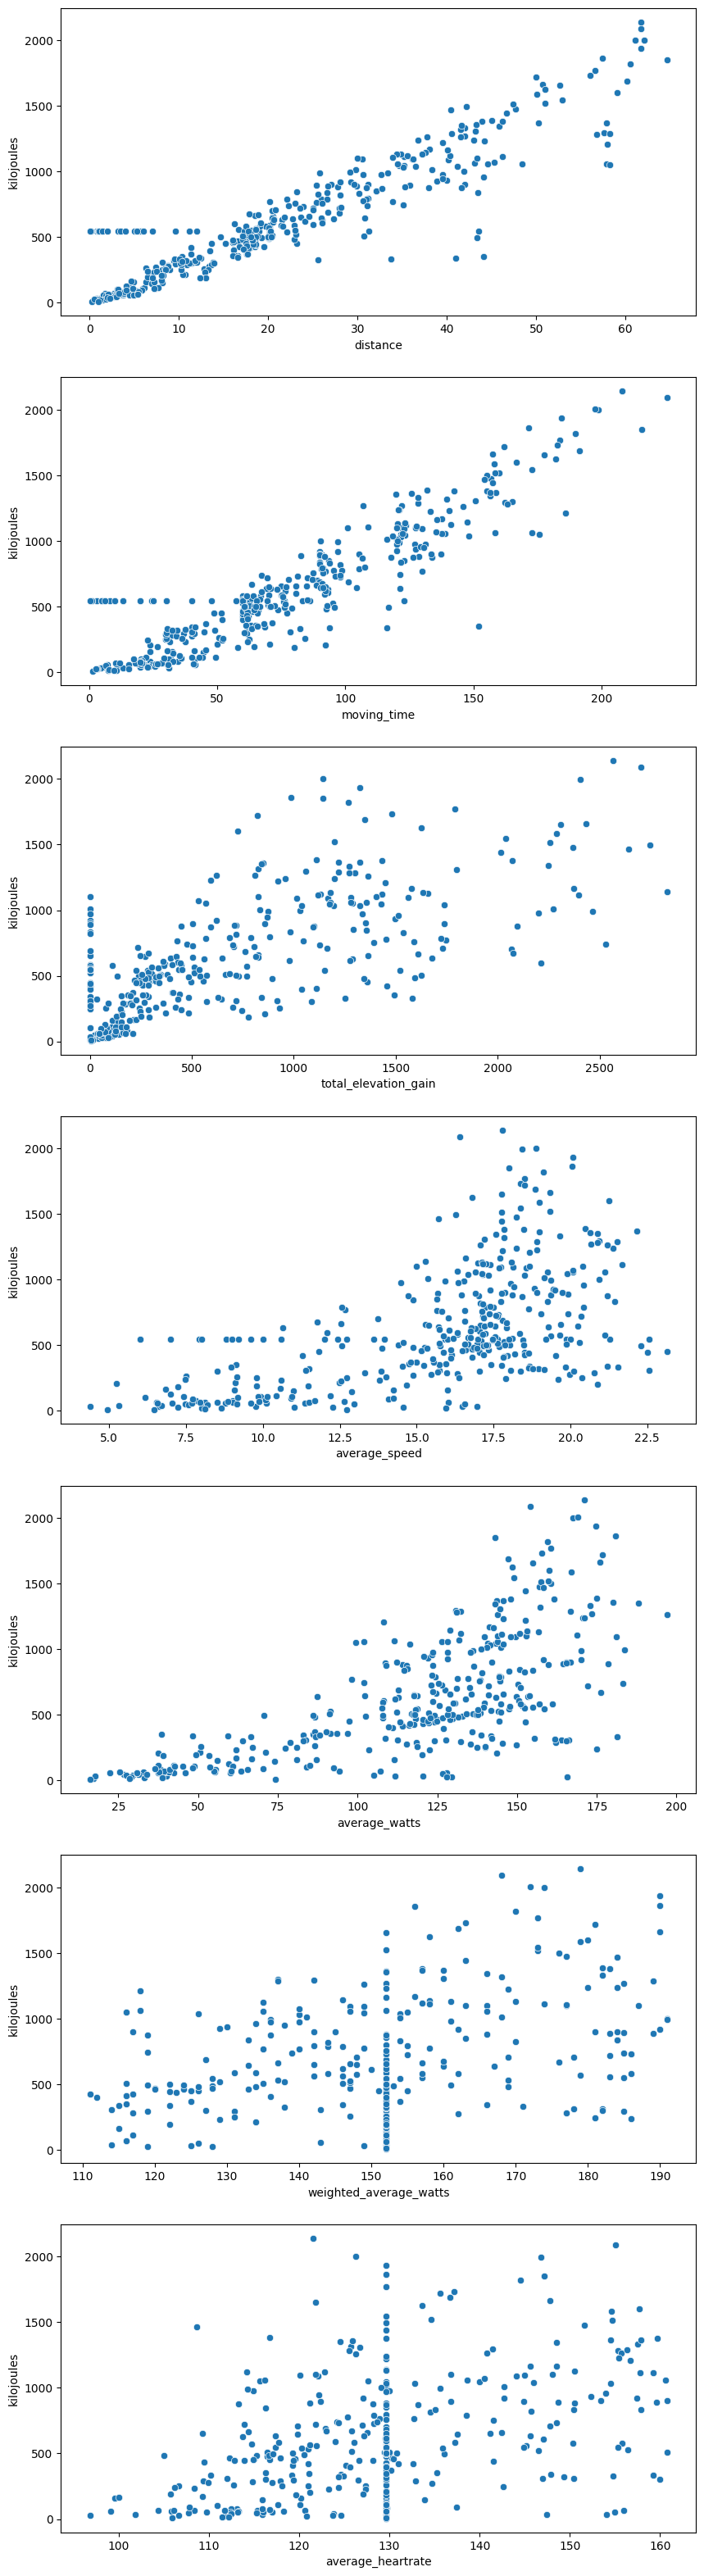

In [163]:
#Seems like the square root transformation yields better results for both distributions
#Let's see the outliers/bad data now
cols = ['distance', 'moving_time', 'total_elevation_gain', 'average_speed',
        'average_watts', 'weighted_average_watts', 'average_heartrate', 'average_cadence']
fig, ax = plt.subplots(7,1, figsize=(10,40))

flat_ax = ax.flatten()

for i, ax in enumerate(flat_ax):
    sns.scatterplot(x=df_backup[cols[i]], y=df_backup['kilojoules'], data=df_backup, ax=ax)

plt.show()

#As we can see there's no outliers since we deleted them when we did the KNN clustering in order to build the labels step

<Axes: >

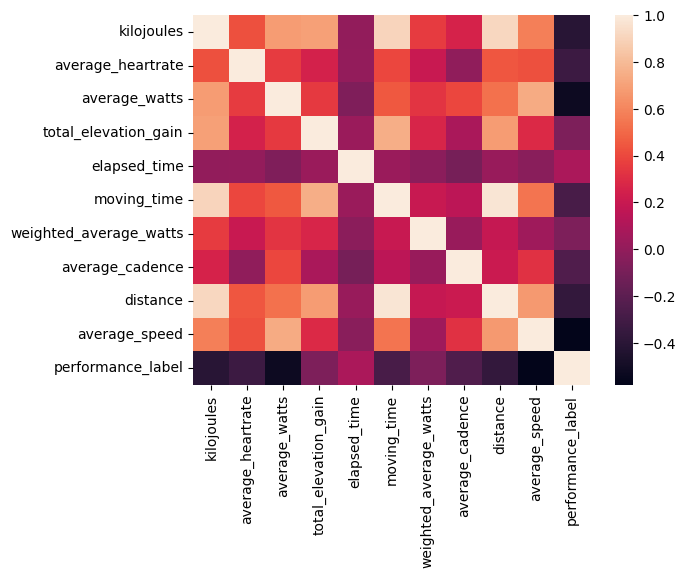

In [164]:
sns.heatmap(df_backup.select_dtypes(include=np.number).corr())


In [165]:
df_backup.isna().sum()

kilojoules                0
average_heartrate         0
average_watts             0
total_elevation_gain      0
elapsed_time              0
moving_time               0
weighted_average_watts    0
average_cadence           0
distance                  0
average_speed             0
performance_label         0
dtype: int64

In [166]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'performance_label']
y = df['performance_label']
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
#drop unnecesarry columns
X_train = X_train.drop(["pr_count", "achievement_count", "name", "sport_type" ,"time_bins", "date", "time"], axis=1)
X_test = X_test.drop(["pr_count", "achievement_count", "name", "sport_type" ,"time_bins", "date", "time"], axis=1)
# Verify the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (624, 10)
X_test shape: (156, 10)
y_train shape: (624,)
y_test shape: (156,)


In [167]:
# create the square root transform
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer


sqrt_pipeline = Pipeline(
    steps=[
        ('sqrt_transform', FunctionTransformer(np.sqrt, feature_names_out='one-to-one')),
        ('strandard_scaler', StandardScaler())
    ]
)

numeric_pipeline = Pipeline(
    steps=[
        ('standard_scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('sqrt_transform', sqrt_pipeline, ['kilojoules', 'total_elevation_gain', 'distance']),
        ('nums', numeric_pipeline, ['average_heartrate', 'average_watts', 'moving_time', 'weighted_average_watts', 'average_cadence', 'average_speed'])
    ], remainder='drop'
)

preprocessor

ColumnTransformer(transformers=[('sqrt_transform',
                                 Pipeline(steps=[('sqrt_transform',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'sqrt'>)),
                                                 ('strandard_scaler',
                                                  StandardScaler())]),
                                 ['kilojoules', 'total_elevation_gain',
                                  'distance']),
                                ('nums',
                                 Pipeline(steps=[('standard_scaler',
                                                  StandardScaler())]),
                                 ['average_heartrate', 'average_watts',
                                  'moving_time', 'weighted_average_watts',
                                  'average_cadence', 'average_speed'])])

In [168]:
X_preprocessed = preprocessor.fit_transform(X)
# Split the preprocessed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=24)

# Verify the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (624, 9)
X_test shape: (156, 9)
y_train shape: (624,)
y_test shape: (156,)


In [169]:
#We now start the MODEL EXPLORATION and CROSS VALIDATION steps

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


linear_regression = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('linear_regression', LinearRegression())
    ]
)
linear_regression

random_forest = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('random_forest', RandomForestRegressor(random_state=42))
    ]
)
random_forest

xgboost = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('xgboost', XGBRegressor(objective='reg:squarederror', random_state=42))
    ]
)
xgboost

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('sqrt_transform',
                                                  Pipeline(steps=[('sqrt_transform',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'sqrt'>)),
                                                                  ('strandard_scaler',
                                                                   StandardScaler())]),
                                                  ['kilojoules',
                                                   'total_elevation_gain',
                                                   'distance']),
                                                 ('nums',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['average_h...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [170]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
# Perform cross-validation for Linear Regression
linear_mses = -cross_val_score(linear_regression, X, y, scoring='neg_root_mean_squared_error', cv=10)
linear_rmse = pd.Series(linear_mses).describe().T

print("Linear Regression RMSE:")
print(linear_rmse)

rf_mses = -cross_val_score(random_forest, X, y, scoring='neg_root_mean_squared_error', cv=10)
rf_rmse = pd.Series(rf_mses).describe().T

print("Random Forest RMSE:")
print(rf_rmse)

# Perform cross-validation for XGBoost
xgb_mses = -cross_val_score(xgboost, X, y, scoring='neg_root_mean_squared_error', cv=10)
xgb_rmse = pd.Series(xgb_mses).describe().T

print("XGBoost RMSE:")
print(xgb_rmse)

Linear Regression RMSE:
count    10.000000
mean      0.215255
std       0.021644
min       0.190263
25%       0.204820
50%       0.204910
75%       0.227656
max       0.248629
dtype: float64
Random Forest RMSE:
count    10.000000
mean      0.049274
std       0.010126
min       0.035145
25%       0.040534
50%       0.051240
75%       0.058100
max       0.062200
dtype: float64
XGBoost RMSE:
count    10.000000
mean      0.001762
std       0.000273
min       0.001429
25%       0.001597
50%       0.001735
75%       0.001855
max       0.002194
dtype: float64


In [171]:
#Seems like XGBoost is the best model for this dataset
#now, model tuning:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgboost__n_estimators': [100, 300, 600, 1000],
    'xgboost__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgboost__max_depth': [3, 5, 7, 9]
}



grid_search = GridSearchCV(xgboost, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('sqrt_transform',
                                                                         Pipeline(steps=[('sqrt_transform',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<ufunc 'sqrt'>)),
                                                                                         ('strandard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['kilojoules',
                                                                          'total_elevation_gain',
                                                                          'distance']),
                                                                        ('nums',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          Sta...
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             param_grid={'xgboost__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'xgboost__max_depth': [3, 5, 7, 9],
                         'xgboost__n_estimators': [100, 300, 600, 1000]},
             scoring='neg_root_mean_squared_error')

In [172]:
# this is the best model
grid_search.best_estimator_


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('sqrt_transform',
                                                  Pipeline(steps=[('sqrt_transform',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'sqrt'>)),
                                                                  ('strandard_scaler',
                                                                   StandardScaler())]),
                                                  ['kilojoules',
                                                   'total_elevation_gain',
                                                   'distance']),
                                                 ('nums',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['average_h...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [178]:
# this is the best params
grid_search.best_params_


{'xgboost__learning_rate': 0.2,
 'xgboost__max_depth': 9,
 'xgboost__n_estimators': 100}

In [180]:
# evaluate on test data

final_mse = mean_squared_error(y_test**2, grid_search.predict(X_test)**2, squared=False)
final_mse

ValueError: X has 9 features, but ColumnTransformer is expecting 17 features as input.